<a href="https://colab.research.google.com/github/suyash64/MOD2_SOL/blob/master/Lung_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
lcd=pd.read_csv("lung_cancer_examples.csv")

In [3]:
lcd.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


In [4]:
lcd.size

295

In [5]:
lcd.columns

Index(['Age', 'Smokes', 'AreaQ', 'Alkhol', 'Result'], dtype='object')

In [6]:
lcd.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


In [7]:
tl=lcd.corr()

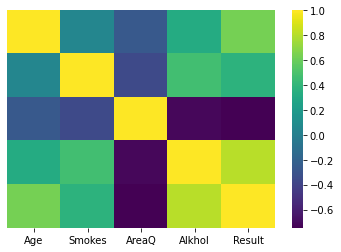

In [8]:
sns.heatmap(tl,yticklabels=False,cmap='viridis')

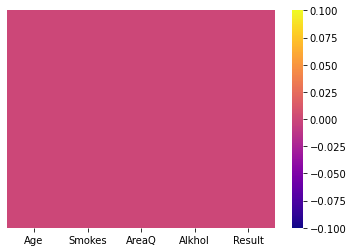

In [9]:

sns.heatmap(lcd.isnull(),yticklabels=False,cmap='plasma')

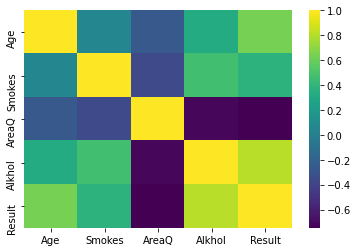

In [10]:
sns.heatmap(tl,yticklabels=True,cmap='viridis')

In [11]:
sns.set_style('whitegrid')

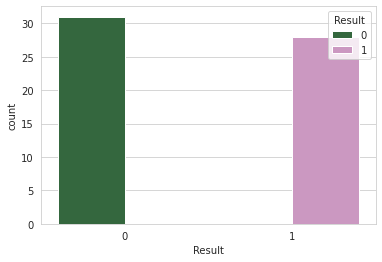

In [12]:
sns.countplot(x="Result",hue="Result",data=lcd,palette='cubehelix')

Text(0, 0.5, 'Age')

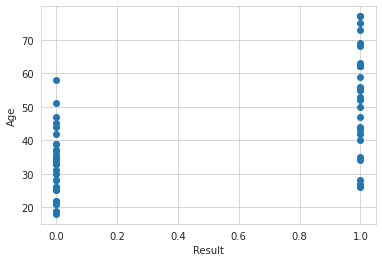

In [13]:

plt.scatter(x="Result",y='Age',data=lcd)
plt.xlabel('Result')
plt.ylabel('Age')

Text(0, 0.5, 'smokes')

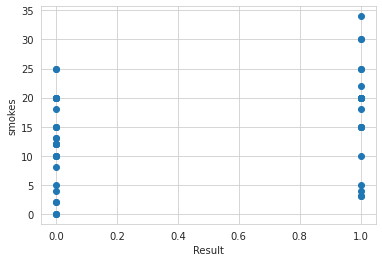

In [14]:

plt.scatter(x="Result",y='Smokes',data=lcd)
plt.xlabel('Result')
plt.ylabel('smokes')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


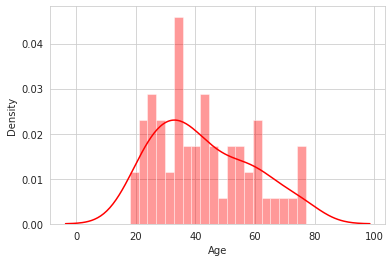

In [15]:
sns.distplot(lcd["Age"],kde=True,color='red',bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


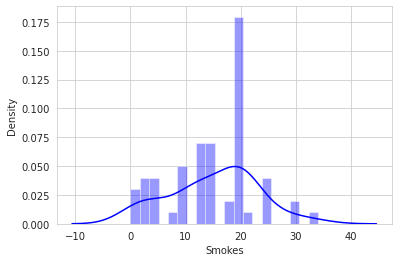

In [16]:
sns.distplot(lcd["Smokes"],kde=True,color='blue',bins=20)

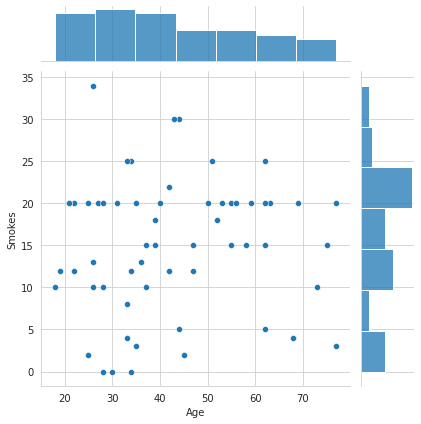

In [17]:
sns.jointplot(x='Age',y='Smokes',data=lcd)

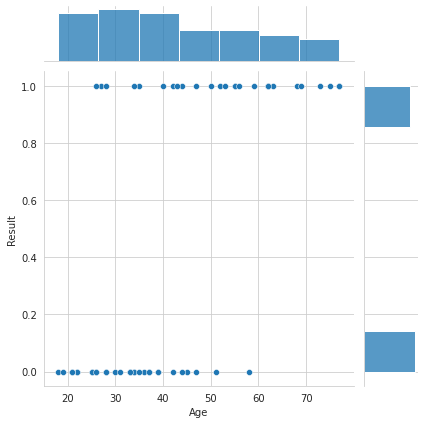

In [18]:
sns.jointplot(x='Age',y='Result',data=lcd)

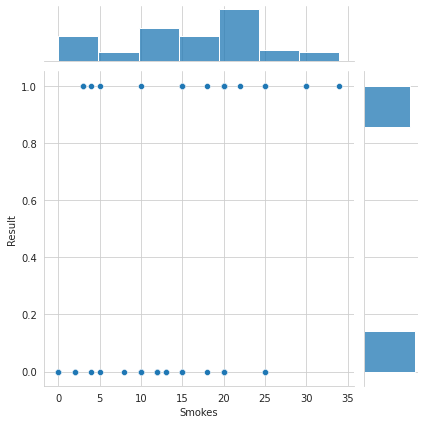

In [19]:

sns.jointplot(x='Smokes',y='Result',data=lcd)

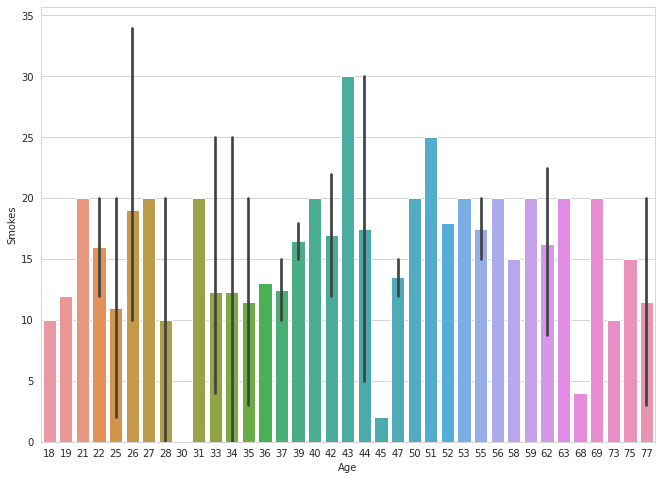

In [20]:

plt.figure(figsize=(11,8))
sns.barplot(x="Age",y="Smokes",data=lcd)

In [21]:

x=['Name','Surname','Age','Smokes','AreaQ','Alkhol','Result']
y=['Prediction']

In [22]:
lcd2=pd.DataFrame(data=lcd)
lcd2.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


In [23]:
from sklearn.model_selection import train_test_split

In [24]:

x_train,x_test,y_train,y_test=train_test_split(lcd.drop('Result',axis=1),lcd['Result'],test_size=.20,random_state=101)

In [25]:

x_test.head()

,Age,Smokes,AreaQ,Alkhol
56,75,15,3,5
22,22,20,6,2
44,39,15,7,2
21,33,8,8,1
25,21,20,5,3


In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:

lr=LogisticRegression()

In [28]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:

pred_lcd=lr.predict(x_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(classification_report(y_test,pred_lcd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [35]:
x=['Age','Smokes','AreaQ','Alkhol']
data=[46,9,7,4]
paitentid_54=pd.DataFrame([data],columns=x)
paitentid_54.head()

,Age,Smokes,AreaQ,Alkhol
0,46,9,7,4


In [36]:
pred_lcd=lr.predict(paitentid_54)

In [37]:
print(pred_lcd)

[1]
